#  Title
### Data source: 
Requested data from [Opus Data API](https://www.opusdata.com)

Inflation data from [US Inflation Calculator](https://www.usinflationcalculator.com)

### Module Imports and custom functions


In [1]:
import seaborn as sns
%matplotlib inline
from data_preprocess import *
sns.set_style('darkgrid')

 Load and Clean MovieData.csv
 

In [2]:
movie_data = load_clean_data()
display(movie_data.head())
display(movie_data.describe())


,year,budget,time,profit
count,1936.000000,1.936000e+03,1822.000000,1.936000e+03
mean,2011.261880,5.342857e+07,109.396817,1.062571e+08
std,3.457548,5.368562e+07,19.644955,1.998624e+08
min,2006.000000,1.000000e+07,0.000000,-1.104502e+08
25%,2008.000000,1.900000e+07,97.000000,-5.267300e+05
50%,2011.000000,3.275000e+07,108.000000,3.589142e+07
75%,2014.000000,6.500000e+07,120.000000,1.237700e+08
max,2018.000000,4.250000e+08,201.000000,2.351345e+09


Top 5 ways to make the most profits at box office

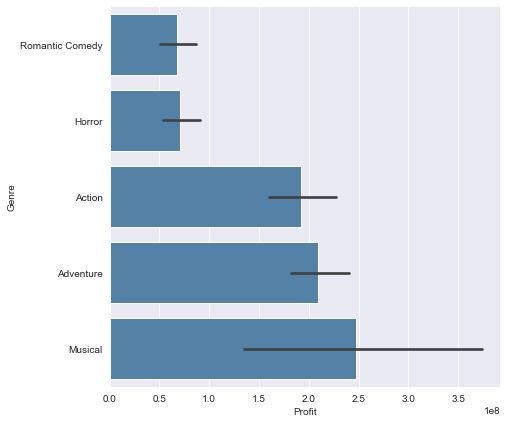

In [8]:
data_bar_graph(movie_data,'genre')

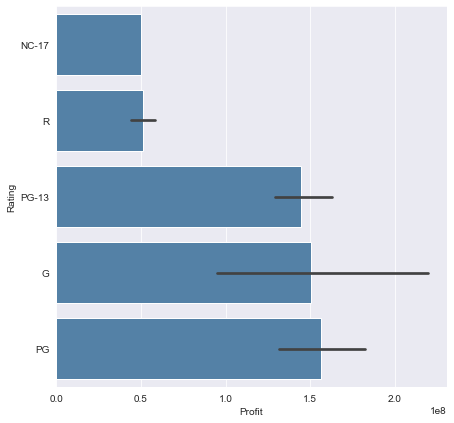

In [9]:
data_bar_graph(movie_data,'rating')

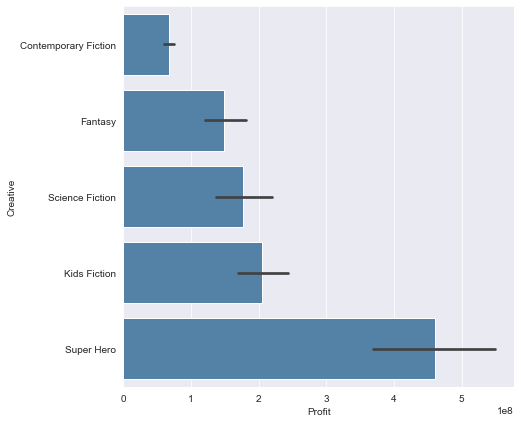

In [10]:
data_bar_graph(movie_data,'creative')

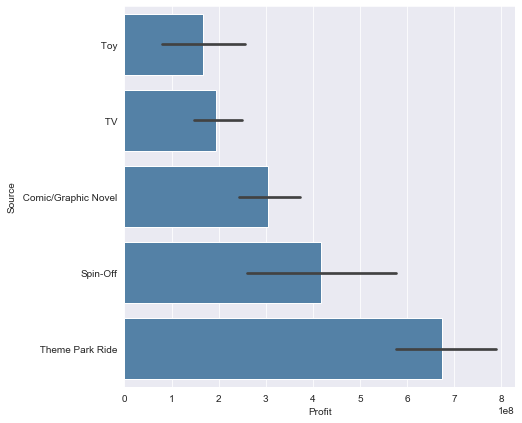

In [11]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
data_bar_graph(movie_data,'source')


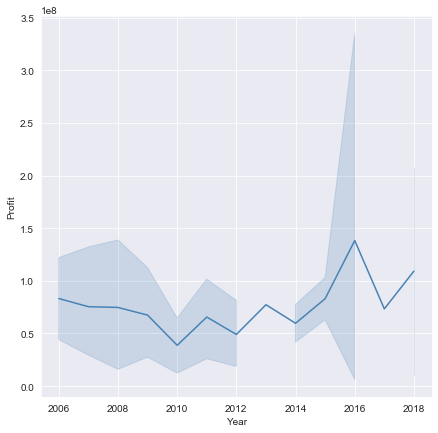

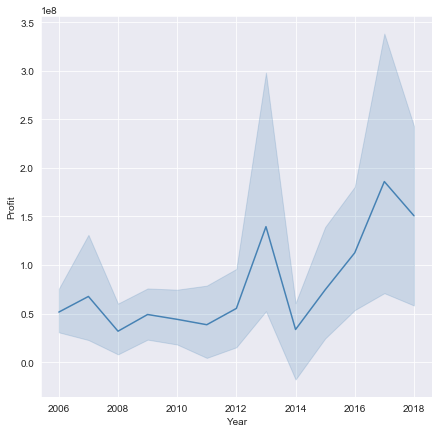

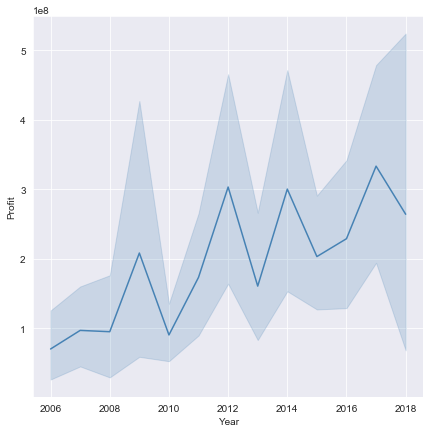

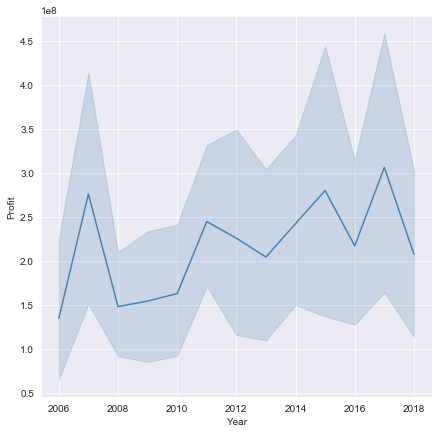

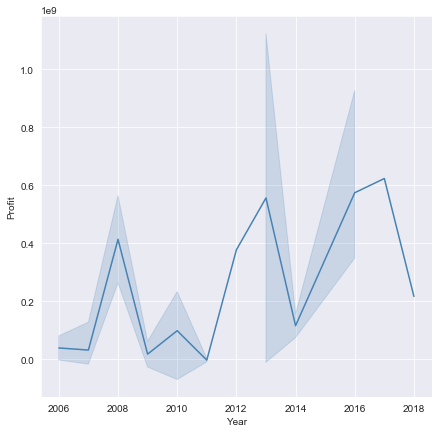

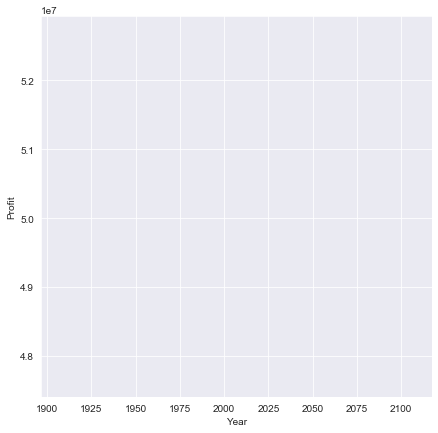

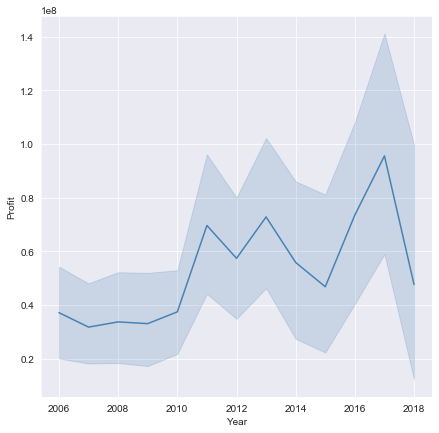

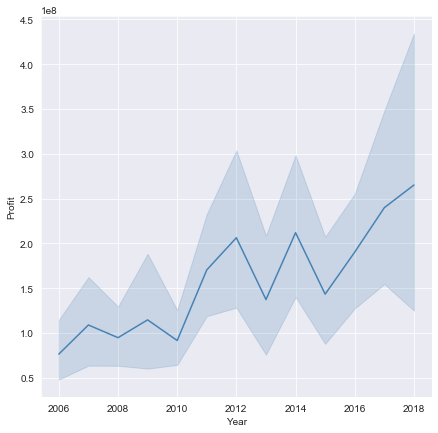

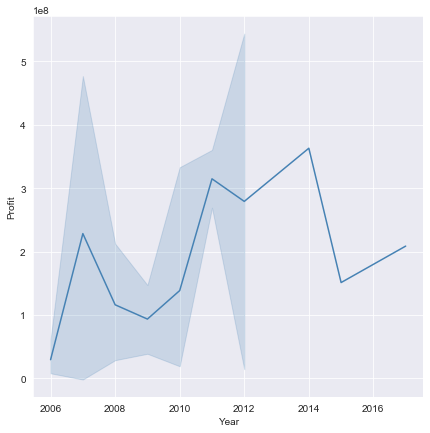

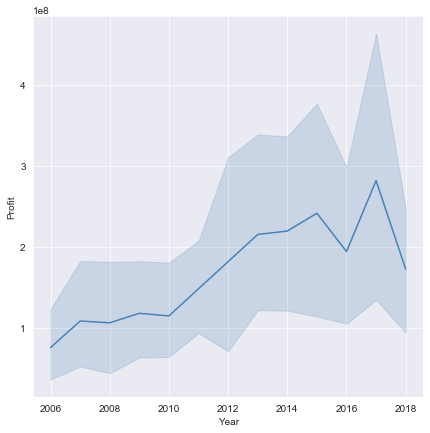

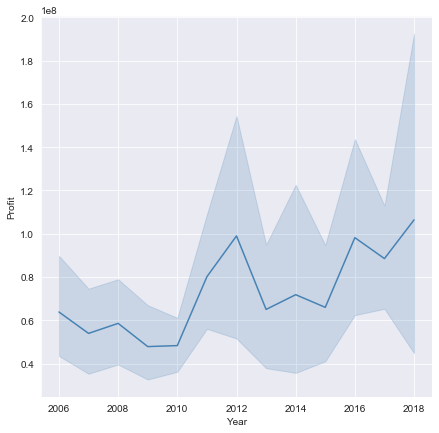

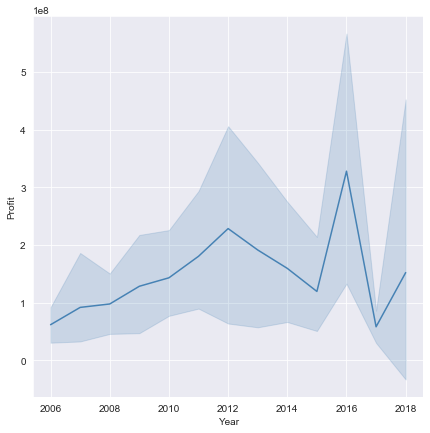

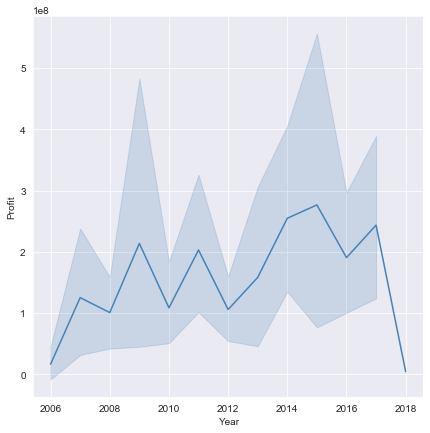

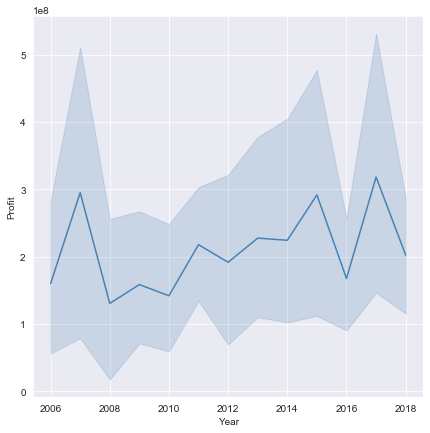

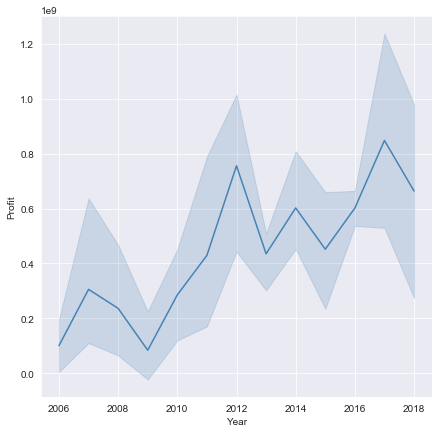

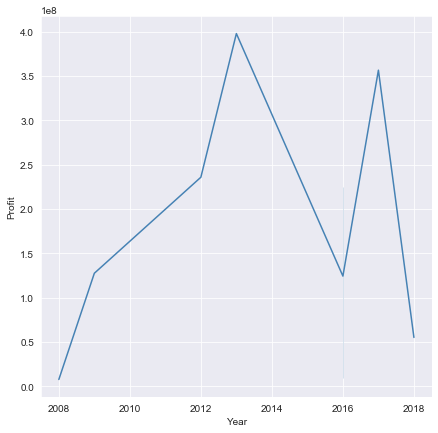

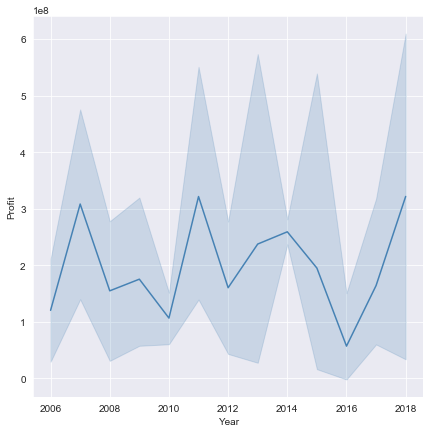

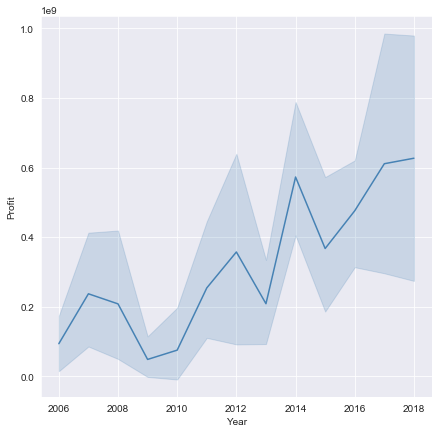

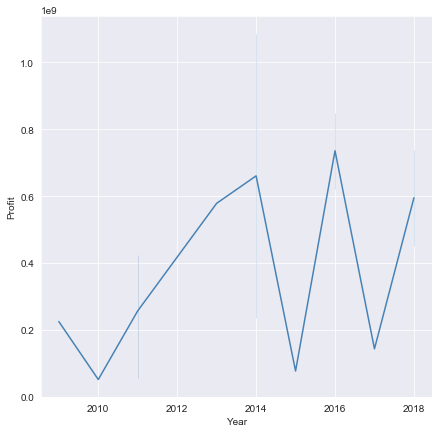

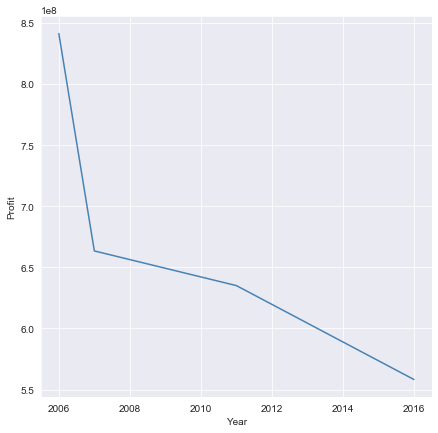

In [14]:
cols = ['genre', 'rating', 'creative', 'source']

for col in cols:
    avg_ = movie_data.groupby(col).agg('mean').reset_index().sort_values('profit')
    for topn in avg_[col][-5:]:
        data_line_graph(subset_df(movie_data,col,topn))
        